# Práctica 5: Regresión lineal regularizada: sesgo y varianza

In [1]:
# Library imports
import numpy as np
from pandas.io.parsers import read_csv
from matplotlib import pyplot as plt
from scipy.io import loadmat
from scipy import optimize
import operator

## 1. Regresión lineal regularizada

In [2]:
data = loadmat('ex5data1.mat')

In [3]:
# Loading data
data = loadmat('ex5data1.mat')

Y = data['y']
X = data['X']
X_orig = data['X']
Xtest = data['Xtest']
Xtest_orig = data['Xtest']
Ytest = data['ytest']
Xval = data['Xval']
Xval_orig = data["Xval"]
Yval = data['yval']
X=np.hstack([np.ones([X.shape[0],1]),X])
Xval=np.hstack([np.ones([Xval.shape[0],1]),Xval])
Xtest=np.hstack([np.ones([Xtest.shape[0],1]),Xtest])

In [4]:
print("#" * 50)
print(X)
print("#" * 50)
print(Y)

##################################################
[[  1.         -15.93675813]
 [  1.         -29.15297922]
 [  1.          36.18954863]
 [  1.          37.49218733]
 [  1.         -48.05882945]
 [  1.          -8.94145794]
 [  1.          15.30779289]
 [  1.         -34.70626581]
 [  1.           1.38915437]
 [  1.         -44.38375985]
 [  1.           7.01350208]
 [  1.          22.76274892]]
##################################################
[[ 2.13431051]
 [ 1.17325668]
 [34.35910918]
 [36.83795516]
 [ 2.80896507]
 [ 2.12107248]
 [14.71026831]
 [ 2.61418439]
 [ 3.74017167]
 [ 3.73169131]
 [ 7.62765885]
 [22.7524283 ]]


In [5]:
thetas= np.ones(X.shape[1])
initial_thetas = np.zeros(X.shape[1])

Creamos funcion de coste y de gradiente

In [6]:
def cost(thetas, X, Y, reg=0):
    m = X.shape[0]
    H = np.dot(X, thetas)
    cost = (1/(2*m)) * np.sum((H-Y.T)**2) + ( reg / (2 * m) ) * np.sum(thetas[1:]**2)
    return cost

def gradient(thetas, X, Y, reg=0):
    tt = np.copy(thetas)
    tt[0]=0
    m = X.shape[0]
    H = np.dot(X, thetas)
    gradient = ((1 / m) * np.dot(H-Y.T,X)) + ((reg/m) * tt)
    return gradient

def linearCostGrad(thetas,X,Y,reg=0):
    return (cost(thetas,X,Y,reg),gradient(thetas,X,Y).flatten())

In [7]:
linearCostGrad(thetas,X,Y)

(303.9515255535976, array([-15.30301567, 598.16741084]))

In [8]:
thetas_opt = optimize.minimize(fun=linearCostGrad,
                       x0=initial_thetas,
                       args=(X,Y),
                       method='TNC',
                       jac=True).x
thetas_opt

array([13.08790351,  0.36777923])

In [9]:
def draw_plot(X,Y,thetas):
    plt.scatter(X[:,1], Y, marker= "x", color="red")
    Y_pred = X @ thetas
    plt.plot(X[:,1], Y_pred)

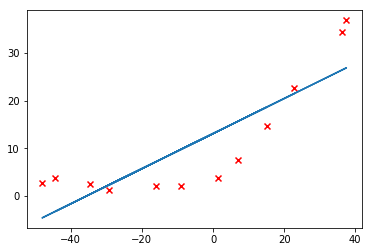

In [10]:
draw_plot(X,Y,thetas_opt)

## 2. Curvas de aprendizaje

In [11]:
def get_errors(x,y, x_val, y_val,reg=0):
    errors_train =  []
    errors_val = []
    for i in range(1,13):
        initial_thetas = np.zeros(x.shape[1])
        thetas = optimize.minimize(fun=linearCostGrad,
                   x0=initial_thetas,
                   args=(x[0:i],y[0:i],reg),
                   method='TNC',
                   jac=True).x
        
        errors_train.append(cost(thetas,x[0:i],y[0:i]))
        errors_val.append(cost(thetas,x_val,y_val))
    return (errors_train, errors_val)

In [12]:
errors_train, errors_val = get_errors(X,Y, Xval, Yval)


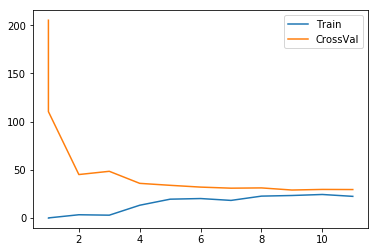

In [13]:
plt.plot(np.linspace(1,11,12,dtype=int),errors_train, label='Train')
plt.plot(np.linspace(1,11,12,dtype=int),errors_val, label='CrossVal')
plt.legend()

## 3. Regresión polinomial

In [14]:
def polinomial_data(X,p):
    X_poly = X
    for i in range(1, p):
        X_poly = np.column_stack((X_poly, np.power(X, i+1)))   
    return X_poly

In [15]:
def normalize(X):
    medias = np.mean(X,axis=0)
    sigmas = np.std(X,axis=0)
    
    X_normalizada = (X - medias) / sigmas
    
    return (X_normalizada, medias, sigmas)

In [16]:
normal_results = normalize(polinomial_data(X_orig,8))
X_normal = normal_results[0]
medias = normal_results[1]
sigmas = normal_results[2]
X_normal=np.hstack([np.ones([X_normal.shape[0],1]),X_normal])

In [17]:
initial_thetas = np.zeros(X_normal.shape[1])

In [18]:
thetas_opt = optimize.minimize(fun=linearCostGrad,
                       x0=initial_thetas,
                       args=(X_normal,Y),
                       method='TNC',
                       jac=True).x
thetas_opt

array([ 11.2210198 ,   9.02284097,  19.00649451,  26.81608579,
       -31.54579746, -64.19769168,  17.86665693,  49.94770283,
        10.33595521])

In [19]:
X_test = np.arange(np.min(X),np.max(X),0.05)
X_test_poly= polinomial_data(X_test,8)
X_test_poly_normal = (X_test_poly - medias) / sigmas
X_test_poly_ones=np.hstack([np.ones([X_test_poly_normal.shape[0],1]),X_test_poly_normal])
Y_pred = X_test_poly_ones @ thetas_opt

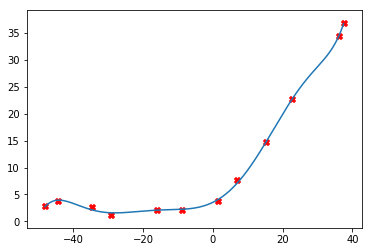

In [20]:
plt.plot(np.arange(np.min(X),np.max(X),0.05),Y_pred)
plt.scatter(X_orig,Y,marker="X", color="red")

In [21]:
Xval_poly = polinomial_data(Xval_orig,8)
Xval_normal = (Xval_poly - medias) / sigmas
Xval_normal_ones=np.hstack([np.ones([Xval_normal.shape[0],1]),Xval_normal])

###  λ = 0

In [22]:
errors_train, errors_val = get_errors(X_normal,Y, Xval_normal_ones, Yval)

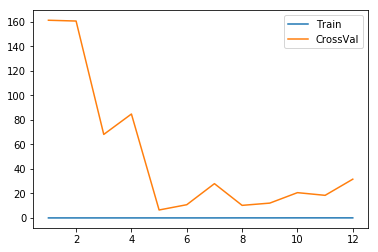

In [23]:
plt.plot(np.linspace(1,12,12,dtype=int),errors_train, label='Train')
plt.plot(np.linspace(1,12,12,dtype=int),errors_val, label='CrossVal')
plt.legend()

###  λ = 1

In [24]:
errors_train, errors_val = get_errors(X_normal,Y, Xval_normal_ones, Yval,1)

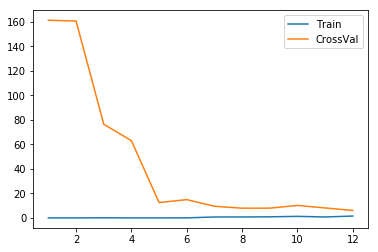

In [25]:
plt.plot(np.linspace(1,12,12,dtype=int),errors_train, label='Train')
plt.plot(np.linspace(1,12,12,dtype=int),errors_val, label='CrossVal')
plt.legend()

###  λ = 100

In [26]:
errors_train, errors_val = get_errors(X_normal,Y, Xval_normal_ones, Yval,100)

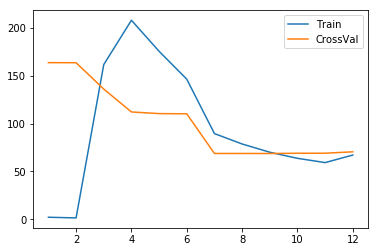

In [27]:
plt.plot(np.linspace(1,12,12,dtype=int),errors_train, label='Train')
plt.plot(np.linspace(1,12,12,dtype=int),errors_val, label='CrossVal')
plt.legend()

## Selección de parámetro λ

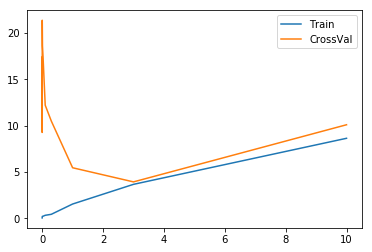

In [28]:
Xval_poly = normalize(polinomial_data(Xval_orig,8))[0]
Xval_normal_ones=np.hstack([np.ones([Xval_poly.shape[0],1]),Xval_poly])
reg =[0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
errors_train = []
errors_val = []

for i in reg:
    initial_thetas = np.zeros(X_normal.shape[1])
    thetas = optimize.minimize(fun=linearCostGrad,
               x0=initial_thetas,
               args=(X_normal,Y,i),
               method='TNC',
               jac=True).x

    errors_train.append(cost(thetas,X_normal,Y,0))
    errors_val.append(cost(thetas,Xval_normal_ones,Yval,0))

plt.plot(reg,errors_train, label='Train')
plt.plot(reg,errors_val, label='CrossVal')
plt.legend()

In [29]:
thetas = optimize.minimize(fun=linearCostGrad,
               x0=initial_thetas,
               args=(X_normal,Y,3),
               method='TNC',
               jac=True).x

X_test_poly= polinomial_data(Xtest_orig,8)
X_test_poly_normal = (X_test_poly - medias) / sigmas
X_test_poly_ones=np.hstack([np.ones([X_test_poly_normal.shape[0],1]),X_test_poly_normal])

errors_test=cost(thetas,X_test_poly_ones,Ytest)
errors_test

3.1846807862327737